# Question 1
## Regularization in Linear Regression
Make a class called LinearRegression which provides two functions : fit and predict. You may use the code present in the repository as template. You need to make the following changes in order to include regularization :
1. To initialize an object of the class, you need to provide 4 parameters : learning_rate, epochs, penalty and alpha (coefficient of the regularization term). Penalty and alpha should have default values of None and 0 respectively.
2. The parameter penalty should take in any one of these inputs : L1 (Lasso), L2 (Ridge) and None (simple LR).
3. Do some basic differentiation to find out the expressions of dC/dw and dC/db when regularization is involved. Use internet whenever necessary.
4. Write if-else statements inside the fit method to cover the different values for dw for different values of penalty.

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [74]:
class LinearRegress:
    def __init__(self, learning_rate, epochs, penalty=None, alpha=0):
        self.lr = learning_rate
        self.epochs = epochs
        self.penalty = penalty
        self.alpha = alpha
    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        y_train = y_train.values.reshape(-1,1)
        self.weights = np.zeros((n_features,1))
        self.bias = np.zeros((1,1))

        for i in range(self.epochs):
            delta= -(y_train-np.dot(X_train,self.weights)-self.bias)/n_samples
            if self.penalty == None:
                dw = np.dot(X_train.T,delta)
                self.weights-= self.lr * dw
            elif self.penalty == "L1":
                dw = np.dot(X_train.T,delta) +  self.alpha*np.sign(self.weights)
                self.weights-= self.lr * dw
            elif self.penalty == "L2":
                dw = np.dot(X_train.T,delta) +  2*self.alpha*self.weights
                self.weights-= self.lr * dw
            db= np.sum(delta).reshape(1,1)

            self.bias-= self.lr* db

    def predict(self, X_test):
        y_predicted = np.dot(X_test,self.weights)+self.bias
        print(self.weights, self.bias)
        return y_predicted


# Question 2
# Linear Regression
Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the 3 models created in question 1 (**linear regression, lasso and ridge regression**) and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>.
10. Tune the hyperparameters of your models (learning rate, epochs, penalty and alpha) to achieve losses close to that of the sklearn models. (*We will cover hyperparameter tuning using GridSearchCV and all in later weeks. For now, you may manually run the model for different values of the hyperparameters.*)

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


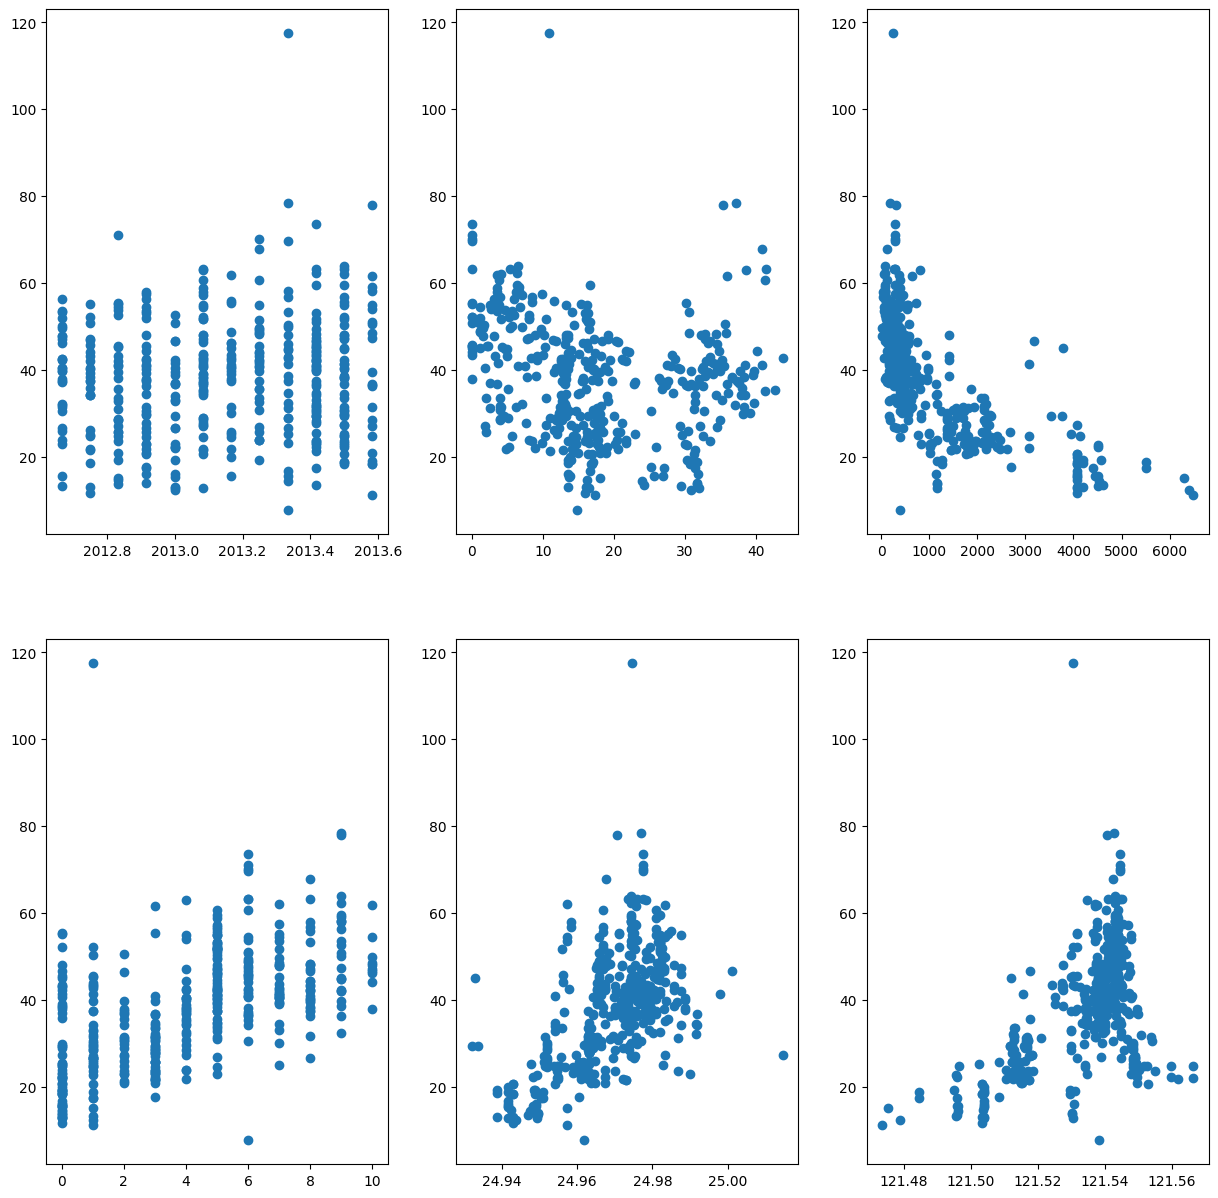

In [75]:
df = pd.read_csv("Real estate.csv")
df.info()
fig, ax = plt.subplots(nrows= 2, ncols= 3, figsize = (15,15))
for i in range(0,6):
    plt.subplot(231+i)
    plt.scatter(df.iloc[:,1+i], df.iloc[:,7])

In [81]:
X = df.drop(columns=['No','X1 transaction date', 'Y house price of unit area'])
y = df['Y house price of unit area']
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
LR = LinearRegress(0.001, 100000, None, 0.2)
LassoR = LinearRegress(0.001, 100000, "L1", 0.01)
RidgeR = LinearRegress(0.001, 100000, "L2", 0.001)
LR.fit(X_train, y_train)
LassoR.fit(X_train, y_train)
RidgeR.fit(X_train, y_train)
y_LR = LR.predict(X_test)
y_LassoR = LassoR.predict(X_test)
y_RidgeR = RidgeR.predict(X_test)

[[ -9.7148073 ]
 [-15.20465541]
 [ 13.31784469]
 [ 20.87683622]
 [ 11.49988135]] [[22.39184485]]
[[ -9.56907178]
 [-15.14651755]
 [ 13.33237738]
 [ 20.5807483 ]
 [ 11.32759972]] [[22.5600909]]
[[ -9.4211684 ]
 [-15.21023343]
 [ 13.36517646]
 [ 19.6750261 ]
 [ 11.01444839]] [[23.10659965]]


In [82]:
print(mean_squared_error(y_test, y_LR))
print(mean_squared_error(y_test, y_LassoR))
print(mean_squared_error(y_test, y_RidgeR))
print(r2_score(y_test, y_LR))
print(r2_score(y_test, y_LassoR))
print(r2_score(y_test, y_RidgeR))
#MSE and R2 for my model

55.09154692492349
55.287021233989364
55.59991343840889
0.6879882874082375
0.6868812160453215
0.6851091468621746


In [83]:
Linear_Regression = LinearRegression()
Linear_Regression.fit(X_train, y_train)
Lasso_Regression = Lasso()
Lasso_Regression.fit(X_train, y_train)
Ridge_Regression = Ridge()
Ridge_Regression.fit(X_train, y_train)
y_Linear_Regression = Linear_Regression.predict(X_test)
y_Lasso_Regression = Lasso_Regression.predict(X_test)
y_Ridge_Regression = Ridge_Regression.predict(X_test)
print(mean_squared_error(y_test, y_Linear_Regression))
print(mean_squared_error(y_test, y_Lasso_Regression))
print(mean_squared_error(y_test, y_Ridge_Regression))
print(r2_score(y_test, y_Linear_Regression))
print(r2_score(y_test, y_Lasso_Regression))
print(r2_score(y_test, y_Ridge_Regression))
#MSE and R2 for SKLearn Model

56.18950777026647
111.68699393790124
55.95599352902249
0.6817699714807322
0.36745921656040426
0.6830924825081388


# Question 3
## Logistic Regression
The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Normalize the X data using MinMaxScaler or StandardScaler.
4. Create a train-test-split. Take any suitable test size.

In [94]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
data = load_breast_cancer()
X = data.data
y = data.target
scaler.fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test  = train_test_split(X, y, train_size=0.8, random_state=1)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


5. Write code for the sigmoid function and Logistic regression.
(Logistic Regression code is available in the Week2/Examples folder. However, try to code it yourself. A template is provided for that.)

*Optional* : Include the regularization terms as you did in the first question. 

In [98]:
def sigmoid(z):
    e=1.0/(1.0+ np.exp(-z))
    return e

def sigmoid_derivative(self, z):
    return self.sigmoid(z)*(1-self.sigmoid(z))

class LogisticRegress:
    def __init__(self, learning_rate, epochs):
      #Initialise the hyperparameters of the model
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape 
        y = y.reshape(-1, 1)
        self.weights=np.random.randn(n_features,1)
        self.bias= np.random.randn(1,1)

        #Implement the GD algortihm
        for _ in range(self.epochs):
            z = np.dot(X,self.weights) + self.bias
            y_pred = sigmoid(z)

            dw = -np.dot(X.T,(y - y_pred))/n_samples
            db = -np.sum(y - y_pred)/n_samples

            self.weights -= self.lr* dw
            self.bias-= self.lr* db

    def predict(self, X):
        y_pred = np.dot(X,self.weights)+self.bias

        for i in range(len(y_pred)):
            if y_pred[i]<= 0.5:
                y_pred[i] = 0
            else:
                y_pred[i] = 1
        return y_pred

6. Fit your model on the dataset and make predictions.
7. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
8. Print accuracy_score in each case using sklearn.metrics .

In [110]:
LR = LogisticRegress(learning_rate= 0.01, epochs = 50000)
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

LR_sklearn = LogisticRegression(penalty= None, max_iter=10000)
LR_sklearn.fit(X_train, y_train)
y_pred_sklearn =  LR_sklearn.predict(X_test)

L1_sklearn = LogisticRegression(penalty='l1', solver= 'liblinear', C= 0.5)
L1_sklearn.fit(X_train, y_train)
y1_pred_sklearn =  L1_sklearn.predict(X_test)

L2_sklearn = LogisticRegression(penalty='l2', C= 0.5)
L2_sklearn.fit(X_train, y_train)
y2_pred_sklearn =  L2_sklearn.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred_sklearn))
print(accuracy_score(y_test, y1_pred_sklearn))
print(accuracy_score(y_test, y2_pred_sklearn))

0.956140350877193
0.9736842105263158
0.9473684210526315
0.956140350877193


9. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
10. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .
11. **Optional Challenge** : For the best model in each case (yours and scikit-learn), print the roc_auc_score and plot the roc curves using sklearn.metrics and matplotlib.

In [113]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, y_pred_sklearn))
print(classification_report(y_test, y1_pred_sklearn))
print(classification_report(y_test, y2_pred_sklearn))

print(confusion_matrix(y_test, y_pred_sklearn))
print(confusion_matrix(y_test, y1_pred_sklearn))
print(confusion_matrix(y_test, y2_pred_sklearn))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        42
           1       0.92      1.00      0.96        72

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        42
           1       0.94      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

[[41  1]
 [ 2 70]]


# Question 4
## KNN and Decision Tree
How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass". 

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.

In [129]:
df = pd.read_csv('glass.csv')
X = df.drop(columns = 'Type')
y = df['Type']
X_train, X_test, y_train, y_test  = train_test_split(X, y, train_size=0.8, random_state=1)

4. Define Euclidean distance.
5. Build the KNN model.
6. Fit the model on the training data. (Note : you may require to change the type of the data from pandas dataframe to numpy arrays. To do that, just do this X=np.array(X) and so on...)

In [148]:
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier

def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KNN(object):
    def __init__(self,k):
        self.k=k
    def fit(self,x_train,y_train):
        self.x_train=x_train
        self.y_train=y_train
    def predict(self,x_test):
        predictions=[self._helper(x) for x in x_test]
        return np.array(predictions)
    def _helper(self,x):
        prediction=[euclidean_distance(x,x1) for x1 in self.x_train]
        indices= np.argsort(prediction)[:self.k]
        labels= [self.y_train[i] for i in indices]
        c=Counter(labels).most_common()
        return c[0][0]

def accuracy(predictions,y_test):
    return np.sum(predictions==y_test)/len(y_test)

In [153]:
KNN_Model = KNN(k=5)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test =  np.array(y_test)
KNN_Model.fit(X_train,y_train)

7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)

In [154]:
y_pred = KNN_Model.predict(X_test)
print(accuracy(y_pred, y_test))

KNN_sklearn = KNeighborsClassifier()
KNN_sklearn.fit(X_train, y_train)
y_pred_sklearn = KNN_sklearn.predict(X_test)
print(accuracy(y_pred_sklearn, y_test))

0.7209302325581395
0.7209302325581395


9. Finally use sklearn.tree to implement a Decision Tree Classifier on this dataset. Check for max depth = 5 to 10. Find out its accuracy.
10. Plot the decision tree.

0.7209302325581395


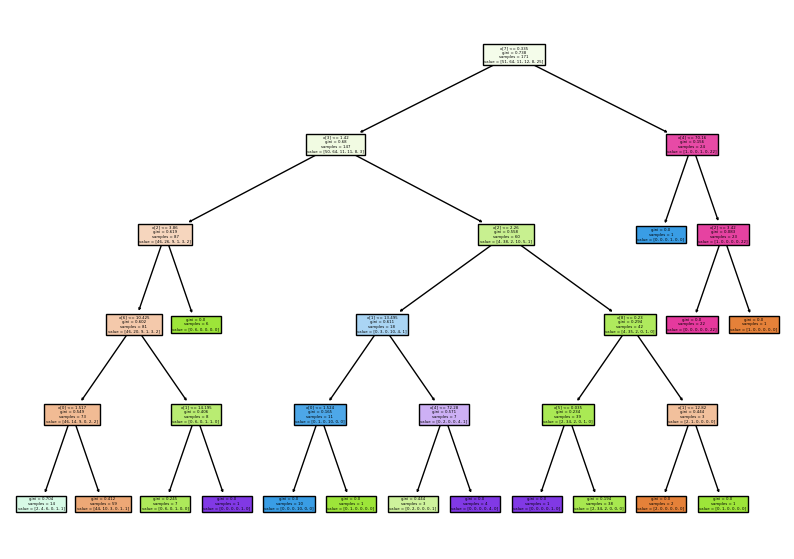

In [168]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

DecisionTree = DecisionTreeClassifier(random_state= 1, max_depth=5)
DecisionTree.fit(X_train, y_train)
y_pred_DT=  DecisionTree.predict(X_test)
print(accuracy(y_pred_DT, y_test))
plt.figure(figsize=(10, 7))
plot_tree(DecisionTree, filled=True)
plt.show()